# 모듈 및 패키지 활용
## 모듈: 각종 변수, 함수, 클래스를 담고 있는 화일 (.py 단위)
- Import 모듈1, 모듈2
- 모듈.변수, 모듈.함수(), 모듈.클래스()

In [45]:
import math
print("원주율은 %.10f 입니다" % math.pi) #math안에 포함된 pi라는 변수 #f: float #소수점 10개까지!
print("원주율은 {0} 입니다".format(math.pi)) #소수점 개수 제어 불가 
print(math.sqrt(4.0)) #math안에 포함된 sqrt라는 함수  #tab키로 추천된 함수,변수,클래스명 확인 가능 #shift+tab: 도움말

# math -> m으로 이름 변환하여 사용


원주율은 3.1415926536 입니다
원주율은 3.141592653589793 입니다
2.0


*  from import: 모듈의 일부만 가져옴

In [43]:
from math import pi, sqrt #모듈과 모듈의 일부 모두 약자로 칭할 수 있음 ex) import numpy as np
#from math import *
print("원주율은 %.4f 입니다." %pi)  #float 서식으로! %.4f
print(sqrt(4.0))

원주율은 3.1416 입니다.
2.0


In [2]:
!pip install pandas

## Scikit-learn을 이용한 machine learning

In [3]:
import pandas as pd
from sklearn import svm, metrics
# XOR 연산
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

In [2]:
xor_df = pd.DataFrame(xor_input)
print(xor_df, "\n")

# 입력을 학습 전용 데이터와 테스트 전용 데이터로 분류하기 
xor_data  = xor_df[[0,1]] # 데이터 (COLUMN 선택)
xor_label = xor_df[2]   # 레이블

print(xor_data)
    
# 데이터 학습과 예측하기 (SVM)
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

# 정답률 구하기 
ac_score = metrics.accuracy_score(xor_label, pre)
print("정답률 =", ac_score)

   0  1  2
0  0  0  0
1  0  1  1
2  1  0  1
3  1  1  0 

   0  1
0  0  0
1  0  1
2  1  0
3  1  1
정답률 = 1.0


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
import pandas as pd
from sklearn import svm, neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 붓꽃의 CSV 데이터 읽어 들이기 --- (※1)
csv = pd.read_csv('iris.csv')
#print(csv)
# 필요한 열 추출하기 --- (※2)
#csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_data = csv.iloc[:, [0,1,2,3]]
#print(csv_data)
#csv_label = csv["Name"]
csv_label = csv.iloc[:, 4]
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label, test_size=0.2)
# SVM으로 학습시키고 예측하기 --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pred = clf.predict(test_data)
# 정답률 구하기 --- (※5)
acc_score = metrics.accuracy_score(test_label, pred)
print("정답률 =", acc_score)
print(confusion_matrix(test_label, pred))

정답률 = 0.9666666666666667
[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
################################################
# KNN으로 학습시키고 예측하기 --- (※4)
clf = neighbors.KNeighborsClassifier(n_neighbors=9,  p=3, metric='minkowski')  #거리 측정 함수 parameter지정 #유클리디안 함수를 일반화한 것 p=2 / p=2이면 manhattan
clf.fit(train_data, train_label)
pred = clf.predict(test_data)
# 정답률 구하기 --- (※5)
acc_score = metrics.accuracy_score(test_label, pred)
print("정답률 =", acc_score)
print(confusion_matrix(test_label, pred)) #교차행렬 testlabel pred 세로 정답 가로 예측  예측율=대각원소합/전체합 ##시험에 나와###

정답률 = 0.9666666666666667
[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]


In [75]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

################################################
# NB로 학습시키고 예측하기 --- (※4)
clf = GaussianNB()
clf.fit(train_data, train_label)
pred = clf.predict(test_data)
# 정답률 구하기 --- (※5)
acc_score = metrics.accuracy_score(test_label, pred)
print("정답률 =", acc_score)
print(confusion_matrix(test_label, pred))

정답률 = 0.9666666666666667
[[ 7  0  0]
 [ 0 13  0]
 [ 0  1  9]]
120
1


In [2]:
from sklearn import datasets
import pandas as pd
from sklearn import svm, neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB

iris = datasets.load_iris()
train_data, test_data, train_label, test_label = train_test_split(iris.data, iris.target, test_size=0.2)

#clf = GaussianNB()
clf = MultinomialNB()
clf.fit(train_data, train_label)
pred = clf.predict(test_data)
acc_score = metrics.accuracy_score(test_label, pred)
print("정답률 =", acc_score)
print(confusion_matrix(test_label, pred))

print("테스트 데이터의 개수: %d" % test_data.shape[0])
print("오분류 개수: %d" % (test_label != pred).sum())

정답률 = 0.9333333333333333
[[ 8  0  0]
 [ 0 10  0]
 [ 0  2 10]]
테스트 데이터의 개수: 30
오분류 개수: 2


## 모델 시각화

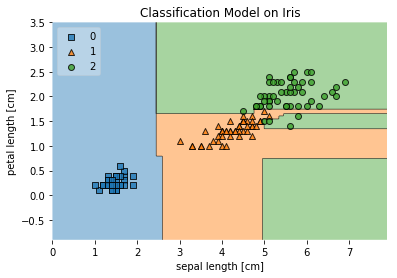

In [58]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] #시각화는 2차원밖에 안되기 때문에 2,3만 가져옴 
y = iris.target  #target이라는 내부변수 

# Training a classifier
#clf = SVC(C=0.5, kernel='rbf')
clf = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
clf.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Classification Model on Iris')
plt.show()



## Wine 데이터 분류 
- Wine 종류: **Red**, **White**, **Rose**

In [154]:
import pandas as pd
from sklearn import datasets
from sklearn import svm, metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import neighbors, metrics, model_selection
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

#wine = datasets.load_wine()

scaler = MinMaxScaler()   #변수마다 척도가 다르기 때문에 스케일링 필요 #0과 1사이로 맞춰주는 #객체 생성
wine = pd.read_csv('wine.csv')
wine_data = wine.iloc[ : ,1:14] #class 아닌 컬럼 
wine_label = wine["class"] #class column

#print(wine_data.iloc[0:5, :])
#print(type(wine_data))
wine_data = scaler.fit_transform(wine_data)  #scaler라는 객체에 fit_transform이라는 함수 
#print(type(wine_data))
#print(wine_data[0:5, : ])

train_data, test_data, train_label, test_label = train_test_split(wine_data, wine_label, test_size=0.2)  #default 25%

clf = svm.SVC()
#clf = GaussianNB()
#clf = MultinomialNB()
#clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_label)
pred = clf.predict(test_data)
result = pd.DataFrame({"정답": test_label, "예측": pred})
print(result[0:10])
acc_score = metrics.accuracy_score(test_label, pred)
print("Accuracy: %.5f" % acc_score)
print(confusion_matrix(test_label, pred))
#scores = model_selection.cross_val_score(clf, csv_data, csv_label, cv=5)
#print(scores)
#print(scores.mean())

     예측  정답
141   3   3
140   3   3
128   2   2
48    1   1
122   2   2
59    2   2
77    2   2
43    2   1
62    2   2
74    2   2
Accuracy: 0.97222
[[ 9  1  0]
 [ 0 18  0]
 [ 0  0  8]]


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [130]:
import pandas as pd

csv = pd.read_csv('iris.csv')
print(csv.iloc[0:10,0:2])
#print(csv["SepalLength"])

   SepalLength  SepalWidth
0          5.1         3.5
1          4.9         3.0
2          4.7         3.2
3          4.6         3.1
4          5.0         3.6
5          5.4         3.9
6          4.6         3.4
7          5.0         3.4
8          4.4         2.9
9          4.9         3.1


In [10]:
# 필요한 열 추출하기 
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]  #DataFrame
# csv_data = csv.iloc[:, 0:4]
# csv_data = csv.iloc[:, [0,1,2,3]]
print(csv_data.iloc[0:9 ,3:4])
csv_label = csv["Name"]  # Series
# csv_label = csv.iloc[:,4]
#print(csv_label[1:5])

   PetalWidth
0         0.2
1         0.2
2         0.2
3         0.2
4         0.2
5         0.4
6         0.3
7         0.2
8         0.2


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)

In [47]:
# 데이터 학습시키고 예측하기 
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)
# 정답률 구하기 
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.9473684210526315


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### SVM을 이용한 iris 데이터 분류 full code

In [5]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 붓꽃의 CSV 데이터 읽어 들이기 
csv = pd.read_csv('iris.csv')

# 필요한 열 추출하기 
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 
train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)

# 데이터 학습시키고 예측하기
clf = svm.SVC() #shift tab눌러보면 kernel함수가 rbf로 default설정되어있음을 알 수 있당
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

result = pd.DataFrame({"label": test_label, "prediction":pre})

print(result[1:5])

# 정답률 구하기 
ac_score = metrics.accuracy_score(test_label, pre)
print("\n정답률 =", ac_score)
print(confusion_matrix(test_label, pre))

               label       prediction
118   Iris-virginica   Iris-virginica
2        Iris-setosa      Iris-setosa
80   Iris-versicolor  Iris-versicolor
138   Iris-virginica   Iris-virginica

정답률 = 0.9473684210526315
[[12  0  0]
 [ 0 11  2]
 [ 0  0 13]]


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## MNIST

In [62]:
import struct

# 레이블 파일과 이미지 파일 열기 #open함수 설명 
lbl_f = open("./mnist/train-labels.idx1-ubyte", "rb") #하드디스크에 있는 이미지 데이터 메모리에 적재 #buffer(임시 메모리공간) #"rb":read
img_f = open("./mnist/train-images.idx3-ubyte", "rb") #적재된 이미지를 가리키는 말 for 메모리 접근: img_f
csv_f = open("./mnist/train.csv", "w", encoding="utf-8") #집어넣을 때도 메모리 필요 -> open("w") write용
    
# 헤더 정보 읽기 
mag, lbl_count = struct.unpack(">II", lbl_f.read(8)) # unpack함수: Binary 값 -> 정수 변환 #8byte씩 읽어들인다
#print(mag, lbl_count)
#label = struct.unpack("B", lbl_f.read(1))[0] # 레이블 데이터 1개 read
#print(label)
#label = struct.unpack("B", lbl_f.read(1))[0] # 레이블 데이터 1개 read
#print(label)
#label = struct.unpack("B", lbl_f.read(1))[0] # 레이블 데이터 1개 read
#print(label)
mag, img_count = struct.unpack(">II", img_f.read(8)) # 0x1234 를  [12][34] 로 표현, Little Endian은 [34][12]로 표현
#print(mag, img_count)
rows, cols = struct.unpack(">II", img_f.read(8))
pixels = rows * cols
print(rows, cols, pixels)

28 28 784


In [63]:
    # 이미지 데이터를 읽고 CSV로 저장하기 
    res = []
    for idx in range(lbl_count): #60000번 반복 
        if idx > 1000: break   # 1000 개만 load
        label = struct.unpack("B", lbl_f.read(1))[0] # 레이블 데이터 1개 read , B : unsigned char
        bdata = img_f.read(pixels)   # image data 28*28 read
        sdata = list(map(lambda n: str(n), bdata)) # 한 pixel씩 문자열로 변환한 후에 list로 변환
        
        # csv로 저장
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")

In [64]:
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)

### csv 변환 full code

In [63]:
import struct
def to_csv(name, maxdata):  #keras에서는 편하게 할 수 있음 
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./mnist/"+name+"-labels.idx1-ubyte", "rb")
    img_f = open("./mnist/"+name+"-images.idx3-ubyte", "rb")
    csv_f = open("./mnist/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기 
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    # 이미지 데이터를 읽고 CSV로 저장하기 
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f: ##open(,,"r"): read용 open(,,"w"): write용 
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
# 결과를 파일로 출력하기 
to_csv("train", 60000)
to_csv("t10k", 500)

In [65]:
import pandas as pd
from sklearn import svm, metrics

train = pd.read_csv('./mnist/train.csv')
test = pd.read_csv('./mnist/t10k.csv')

# 필요한 열 추출하기 
train_images = train.iloc[:, 1:]
train_label = train.iloc[:, 0]
test_images = test.iloc[:, 1:]
test_label = test.iloc[:, 0]

#print(train_label)

### MNIST 예측

In [ ]:
import pandas as pd
from sklearn import svm, metrics

# 붓꽃의 CSV 데이터 읽어 들이기 
train = pd.read_csv('./mnist/train.csv')  #픽셀값 0~255: 진할수록 값이 큼 
test = pd.read_csv('./mnist/t10k.csv')

# 필요한 열 추출하기 
train_images = train.iloc[:, 1:]
train_label = train.iloc[:, 0]
test_images = test.iloc[:, 1:]
test_label = test.iloc[:, 0]

# 0과 1사이의 실수로 정규화
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images/255  #값이 0과 1사이로 바뀜 (픽셀 최대값 255)
test_images = test_images/255

# 데이터 학습시키고 예측하기
clf = svm.SVC()
clf.fit(train_images, train_label)
pre = clf.predict(test_images)

result = pd.DataFrame({"label": test_label, "prediction":pre})

print(result[0:10])

# 정답률 구하기 
ac_score = metrics.accuracy_score(test_label, pre)
print("\n정답률 =", ac_score)

c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### preprocessing

### 정규화

In [34]:
import pandas as pd
from sklearn.preprocessing import scale, minmax_scale, MinMaxScaler

x = pd.DataFrame({'col':[14.00,90.20,90.95,96.27,91.21]})
# 평균 0, 분산을 이용해 정규화
# astype(float)는 scale의 입력이 float이므로 warning방지를 위해 변환
x["scale"] = scale(x[['col']])  # z-scoring
    
print(x)
# 0과 과 1 사이의 값으로 변환
x['minmax_scale'] = minmax_scale(x[['col']]) # min-max scaling

print(x)

     col     scale
0  14.00 -1.995290
1  90.20  0.436356
2  90.95  0.460289
3  96.27  0.630058
4  91.21  0.468586
     col     scale  minmax_scale
0  14.00 -1.995290      0.000000
1  90.20  0.436356      0.926219
2  90.95  0.460289      0.935335
3  96.27  0.630058      1.000000
4  91.21  0.468586      0.938495


In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, minmax_scale


scaler = MinMaxScaler()

dfTest = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],
                       'B':[103.02,107.26,110.35,114.23,114.68],
                       'C':['big','small','big','small','small']})

#result = scaler.fit_transform(dfTest[['A']])
dfTest[['A', 'B']] = scaler.fit_transform(dfTest[['A', 'B']])
print(dfTest)
dfTest[['A', 'B']] = minmax_scale(dfTest[['A', 'B']])
print(dfTest)

          A         B      C
0  0.000000  0.000000    big
1  0.926219  0.363636  small
2  0.935335  0.628645    big
3  1.000000  0.961407  small
4  0.938495  1.000000  small
          A         B      C
0  0.000000  0.000000    big
1  0.926219  0.363636  small
2  0.935335  0.628645    big
3  1.000000  0.961407  small
4  0.938495  1.000000  small


## Encoding

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

r = le.fit(["paris", "paris", "tokyo", "amsterdam", "seoul"])
print(r.classes_)
print(le.classes_)

['amsterdam' 'paris' 'seoul' 'tokyo']
['amsterdam' 'paris' 'seoul' 'tokyo']


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #onehotencoding하기 위한 객체를 만들어놓음

le.fit(["paris", "paris", "tokyo", "amsterdam", "seoul"]) #코드화
print(le.classes_) #알파벳 순서로 코드화 
#print(type(le.classes_), "\n")

data = le.transform(["tokyo", "tokyo", "paris", "amsterdam", "seoul"]) #코드화된 코드로 변환 
print(data)
#print(type(data), "\n")

original = le.inverse_transform([3, 3, 1, 0, 2])
print(original)
#print(type(data))

['amsterdam' 'paris' 'seoul' 'tokyo']
[3 3 1 0 2]
['tokyo' 'tokyo' 'paris' 'amsterdam' 'seoul']


In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

str = []
for i in range(ord('a'), ord('z')+1):  # ord('a'): 'a'이 ascii code
    str.append(i)                 # chr(i): ascii code i에 해당하는 문자
print(str)

le.fit(str)
data = le.transform(['x', 'y', 'z']) 
#print(data)

    

[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]


ValueError: bad input shape (1, 3)

In [55]:
from sklearn import preprocessing
import pandas as pd

le = preprocessing.LabelEncoder() 
df = pd.DataFrame({'A': ['a', 'b', 'b', 'c', 'a'],
                                       'B': ['x', 'y', 'x', 'y', 'x']})

# fit_transform: fit과 tranform을 동시에 처리
# df.apply는 dataframe에서 인자로 주어진 함수를 각 column에 적용하는 함수 #다수개의 column에 대해서 동시에 encoding
data = df.apply(le.fit_transform)
print(data)
print(type(data), "\n")

   A  B
0  0  0
1  1  1
2  1  0
3  2  1
4  0  0
<class 'pandas.core.frame.DataFrame'> 



In [50]:
import pandas as pd

df = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea','germany']})
a = pd.get_dummies(df,prefix=['country'])
print(a)

   country_australia  country_germany  country_korea  country_russia
0                  0                0              0               1
1                  0                1              0               0
2                  1                0              0               0
3                  0                0              1               0
4                  0                1              0               0


In [51]:
import pandas as pd

df = pd.DataFrame({'A': ['a', 'b', 'b', 'c', 'a'],
                                       'B': ['x', 'y', 'x', 'y', 'x']})
print(df)
a = pd.get_dummies(df,prefix=['A', 'B'])
print(a)

   A  B
0  a  x
1  b  y
2  b  x
3  c  y
4  a  x
   A_a  A_b  A_c  B_x  B_y
0    1    0    0    1    0
1    0    1    0    0    1
2    0    1    0    1    0
3    0    0    1    0    1
4    1    0    0    1    0


In [52]:
import pandas as pd

df = pd.DataFrame({'A': ['a', 'b', 'b', 'c', 'a'],
                                        'B': [3,  4,   7,   2,  5]})
a = pd.get_dummies(df, prefix=['A'])
print(a)

   B  A_a  A_b  A_c
0  3    1    0    0
1  4    0    1    0
2  7    0    1    0
3  2    0    0    1
4  5    1    0    0


In [62]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

X1 = pd.DataFrame({'country': ['russia', 'germany', 'australia','korea','germany']})

# 곧바로 one-hot encoding이 안됨. data frame 전체를 라벨인코딩후(숫자로 변환 후)에 one-hot encoding을 해야함
# data frame에 대한 one-hot encoding -> label encoding + one-hot encoding
le = LabelEncoder()
X2 = X1.apply(le.fit_transform)
print(X2)
#print(X2, type(X2))
#print("\n")

oe = OneHotEncoder()
X2 = oe.fit_transform(X2)  #  결과는 sparse matrix로 변환됨
print(X2)
print(type(X2))
#print("\n")

X3 = X2.toarray() # numpy array로 변환. 추후에 dataframe으로 변환
print(X3)
print(type(X3))

#X4 = pd.DataFrame(X3)
#print(X4)

   country
0        3
1        1
2        0
3        2
4        1
  (0, 3)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 2)	1.0
  (4, 1)	1.0
<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
<class 'numpy.ndarray'>


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [85]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

X = pd.DataFrame({'A': ['a', 'b', 'b', 'c', 'a'],
                                    'B': ['x', 'y', 'x', 'y', 'x']})

# 곧바로 one-hot encoding이 안됨. data frame 전체를 라벨인코딩후(숫자로 변환 후)에 one-hot encoding을 해야함
# data frame에 대한 one-hot encoding -> label encoding + one-hot encodingle = LabelEncoder()
X2 = X.apply(le.fit_transform)
print(X2)
print(type(X2))

encoder = OneHotEncoder()
X2 = encoder.fit_transform(X2)  
#  결과는 sparse matrix로 변환됨. 더이상 dataframe이 아니므로 column명이 소실됨
print(X2)
print(type(X2))

X3 = X2.toarray() # numpy array로 변환. 추후에 dataframe으로 변환
print(X3)
print(type(X3))

X4= pd.DataFrame(X3)
#print(X4)
#print(type(X4))

   A  B
0  0  0
1  1  1
2  1  0
3  2  1
4  0  0
<class 'pandas.core.frame.DataFrame'>
  (0, 3)	1.0
  (0, 0)	1.0
  (1, 4)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (4, 0)	1.0
<class 'scipy.sparse.csr.csr_matrix'>
[[1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]
<class 'numpy.ndarray'>


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [88]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

X = pd.DataFrame({'A': ['a', 'b', 'b', 'c', 'a'],
                                      'B': [3, 4, 5, 1, 7]})

le = LabelEncoder()
X['A'] = le.fit_transform(X['A']) 
# X.A는 series이므로 apply함수를 적용하지 않고 fit_transform이 인자로 넣어야 함
print(X)

# onehot encoding이 필요한 column만 지정
encoder = OneHotEncoder(categorical_features=[True, False])

X2 = encoder.fit_transform(X)  #  결과는 sparse matrix로 변환됨
print(X2, type(X2))

X3 = X2.toarray() # numpy array로 변환. 
print(X3, type(X3))

X4 = pd.DataFrame(X3) # 최종적으로 dataframe으로 다시 변환
#print(X4, type(X4))

   A  B
0  0  3
1  1  4
2  1  5
3  2  1
4  0  7
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 0)	1.0
  (0, 3)	3.0
  (1, 3)	4.0
  (2, 3)	5.0
  (3, 3)	1.0
  (4, 3)	7.0 <class 'scipy.sparse.coo.coo_matrix'>
[[1. 0. 0. 3.]
 [0. 1. 0. 4.]
 [0. 1. 0. 5.]
 [0. 0. 1. 1.]
 [1. 0. 0. 7.]] <class 'numpy.ndarray'>


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### Missing value 처리

In [4]:
import pandas as pd
dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)
print(dataset[0:10])
print((dataset[0:10] == 0))
print((dataset[0:10] == 0).sum())

    0    1   2   3    4     5      6   7  8
0   6  148  72  35    0  33.6  0.627  50  1
1   1   85  66  29    0  26.6  0.351  31  0
2   8  183  64   0    0  23.3  0.672  32  1
3   1   89  66  23   94  28.1  0.167  21  0
4   0  137  40  35  168  43.1  2.288  33  1
5   5  116  74   0    0  25.6  0.201  30  0
6   3   78  50  32   88  31.0  0.248  26  1
7  10  115   0   0    0  35.3  0.134  29  0
8   2  197  70  45  543  30.5  0.158  53  1
9   8  125  96   0    0   0.0  0.232  54  1
       0      1      2      3      4      5      6      7      8
0  False  False  False  False   True  False  False  False  False
1  False  False  False  False   True  False  False  False   True
2  False  False  False   True   True  False  False  False  False
3  False  False  False  False  False  False  False  False   True
4   True  False  False  False  False  False  False  False  False
5  False  False  False   True   True  False  False  False   True
6  False  False  False  False  False  False  False  False  Fa

In [133]:
import pandas as pd
import numpy as np

dataset = read_csv('pima-indians-diabetes.csv', header=None)

# 1부터 5컬럼까지에서 0을  NAN으로 바꾸고 그 결과를 dataset에 저장
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.NaN)

# print the first 20 rows of data
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [137]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)

# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.NaN)
print(dataset.shape)

# drop rows with missing values
dataset.dropna(inplace=True)

# summarize the number of rows and columns in the dataset
print(dataset.shape)

(768, 9)
(392, 9)


In [139]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('pima-indians-diabetes.csv', header=None)
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, numpy.NaN)

print(dataset.mean())

# fill missing values with mean column values
dataset.fillna(dataset.mean(), inplace=True)

# count the number of NaN values in each column
print(dataset.isnull().sum())

0      3.845052
1    121.686763
2     72.405184
3     29.153420
4    155.548223
5     32.457464
6      0.471876
7     33.240885
8      0.348958
dtype: float64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


### Random forest

In [1]:
import urllib.request as req
local= "mushroom.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, local)
print("ok")

ok


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 데이터 읽어 들이기
mr = pd.read_csv("mushroom.csv", header=None)

# label 분리
df = pd.DataFrame(mr.iloc[:, 0])

# 두번째 컬럼부터 마지막 컬럼까지 one-hot encoding하고 label에 붙임
df = df.join(pd.get_dummies(mr.iloc[:, 1:]))


data = df.iloc[:, 1:]
label = df.iloc[:, 0]

# 학습 전용 데이터와 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

# 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

# 데이터 예측하기
predict = clf.predict(data_test)

# 결과 테스트하기
result = pd.DataFrame({"label": label_test, "pre": predict})
print(result[0:10])

ac_score = metrics.accuracy_score(label_test, predict)
print(metrics.confusion_matrix(label_test,predict))
print("정답률 =", ac_score) #100프로 예측 

     label pre
3096     e   e
2485     e   e
4022     p   p
5195     p   p
989      e   e
2811     e   e
5111     p   p
7285     p   p
2202     e   e
5642     p   p
정답률 = 1.0


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### KNN

In [57]:
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split

# 붓꽃의 CSV 데이터 읽어 들이기 
csv = pd.read_csv('iris.csv')

# 필요한 열 추출하기 
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
train_data, test_data, train_label, test_label = \
train_test_split(csv_data, csv_label)

# 데이터 학습시키고 예측하기 
knn = neighbors.KNeighborsClassifier(n_neighbors=19)
knn.fit(train_data, train_label)
pre = knn.predict(test_data)

# 정답률 구하기 
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.868421052631579


### NB

In [28]:
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# 붓꽃의 CSV 데이터 읽어 들이기 
csv = pd.read_csv('iris.csv')

# 필요한 열 추출하기 
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
train_data, test_data, train_label, test_label = \
train_test_split(csv_data, csv_label)

# 데이터 학습시키고 예측하기 
nb = GaussianNB()
nb = MultinomialNB()

nb.fit(train_data, train_label)
pre = nb.predict(test_data)

# 정답률 구하기 
ac_score = metrics.accuracy_score(test_label, pre)
print("정답률 =", ac_score)

정답률 = 0.8947368421052632


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import numpy as np

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
#Create a Gaussian Classifier
model = GaussianNB()
#model = MultinomialNB()

# Train the model using the training sets 
model.fit(x, y)

#Predict Output 
predicted= model.predict([[1,2],[3,4]])
print(predicted)

[3 4]


### Cross Validation

In [2]:
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re
# 붓꽃의 CSV 데이터 읽어 들이기 
csv = pd.read_csv('iris.csv')

# 리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하기 
data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
label = csv["Name"]
print(len(data))

clf = svm.SVC()
scores = model_selection.cross_val_score(clf, data, label, cv=5)

print("각 시행의 정답률 =", scores)
print("평균 정답률 =", scores.mean())  #test data 평가는 아직 안 한 코드!

150
각 시행의 정답률 = [0.96666667 1.         0.96666667 0.96666667 1.        ]
평균 정답률 = 0.9800000000000001


c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\hjkim\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

In [12]:
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re
# 붓꽃의 CSV 데이터 읽어 들이기 
csv = pd.read_csv('iris.csv')
print(csv[1:10])

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa
